In [144]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

## Load dataset

In [145]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [146]:
df=data.copy()
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Summarize the data

In [147]:
df.shape

(7043, 21)

#### This dataset have 7043 rows and 21 features/columns

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [149]:
# convert the categorical column "TotalCharges" to Numerical
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")


# Exploring datatypes of each features
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Checking Missing/null values

In [150]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

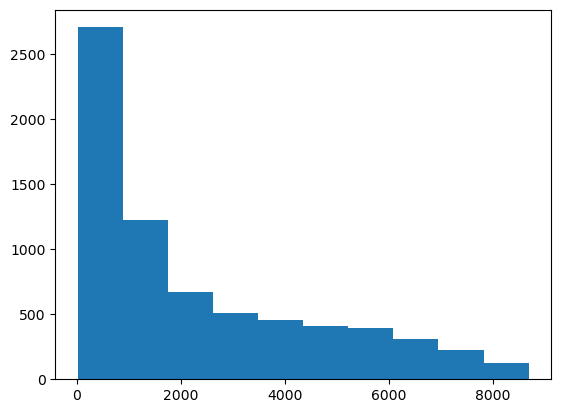

In [151]:

plt.hist(df["TotalCharges"])

plt.show()

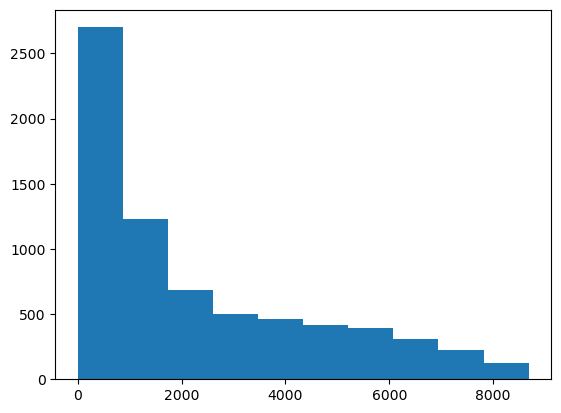

In [152]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["tenure"]*df["MonthlyCharges"])
plt.hist(df["TotalCharges"])

plt.show()

### Again check null values

In [153]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Renaming some columns 

In [154]:
df.rename(columns={'gender':'Gender', 
                   'customerID':'CustomerID', 
                   'Contract':'ContractType', 
                   'InternetService':'InternetServiceType', 
                   'tenure':'Tenure'},inplace=True)

## Drop columns

In [155]:
df.drop(["CustomerID"],axis=1,inplace=True)
df.head(2)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


## Checking duplicates

In [156]:
df.duplicated().sum()

22

In [157]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.duplicated().sum()

0

In [158]:
df.columns.duplicated().sum()

0

### Categorical,Numerical,Target columns 

In [159]:
cat_cols=["Gender","Partner","Dependents","SeniorCitizen","PhoneService","MultipleLines", 
          "InternetServiceType","OnlineSecurity","OnlineBackup","DeviceProtection", 
          "TechSupport","StreamingTV","StreamingMovies","ContractType", 
          "PaperlessBilling","PaymentMethod"]
num_cols=["Tenure","MonthlyCharges","TotalCharges"]

target_col=['Churn']

### Descriptive statistics for Categorical columns

In [160]:
df[cat_cols].describe(include="all")

,Gender,Partner,Dependents,SeniorCitizen,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod
count,7021,7021,7021,7021.000000,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021
unique,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3541,3619,4911,NaN,6339,3368,3090,3490,3080,3087,3465,2802,2777,3853,4161,2359
mean,NaN,NaN,NaN,0.162512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.368947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Descriptive statistics for Numerical columns

In [161]:
df[num_cols].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000
mean,32.469449,64.851894,2286.765026
std,24.534965,30.069001,2266.855057
min,0.000000,18.250000,0.000000
25%,9.000000,35.750000,403.350000
50%,29.000000,70.400000,1400.550000
75%,55.000000,89.900000,3801.700000
max,72.000000,118.750000,8684.800000


#### Based on numerical columns analysis, 
#### * Average tenure of subscriber is 32 months. 
#### * Average monthly charges of subscriber is 64 dollars. 
#### * Average totalcharges of subscriber is 2279 dollars.

## Checking Outliers

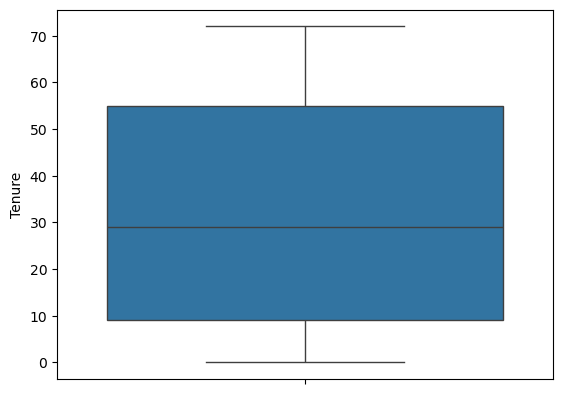

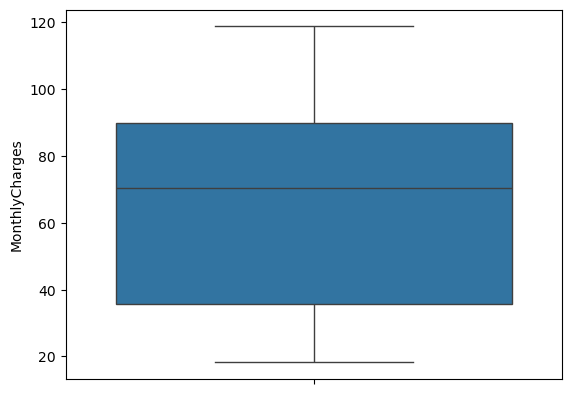

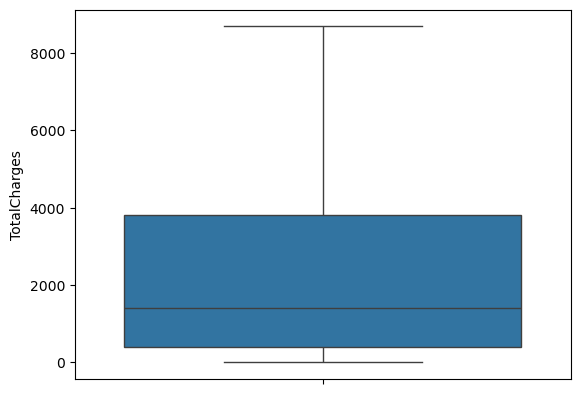

In [162]:
for col in num_cols: 
    sns.boxplot(df[col]) 
    plt.show() 
    

No outlier has been detected for the numerical values

## Exploratory data analysis(EDA)

### Univariate Analysis of Target columns 

  Churn  Count
0    No   5164
1   Yes   1857


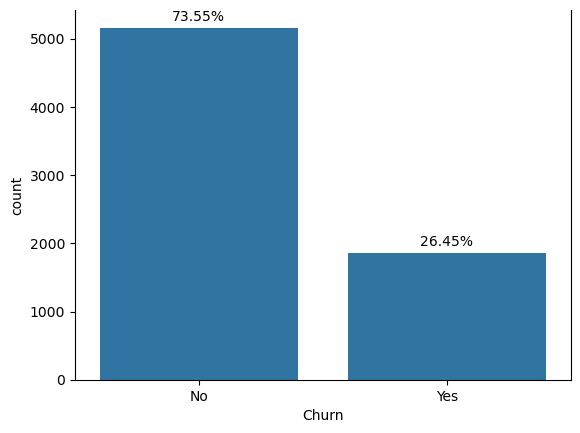

In [163]:
ax=sns.countplot(x=df["Churn"])
rate=df["Churn"].value_counts()
print(rate.reset_index(name='Count'))

for i,v in enumerate(rate):
    percentage=df["Churn"].value_counts(normalize=True)*100
    plt.text(i,v+100,str(round(percentage.iloc[i],2))+"%",ha="center")

for spine in plt.gca().spines.values():
             spine.set_visible(False) if spine.spine_type == 'top' else spine.set_visible(True)

plt.show()

### Univariate Analysis of Numerical columns 

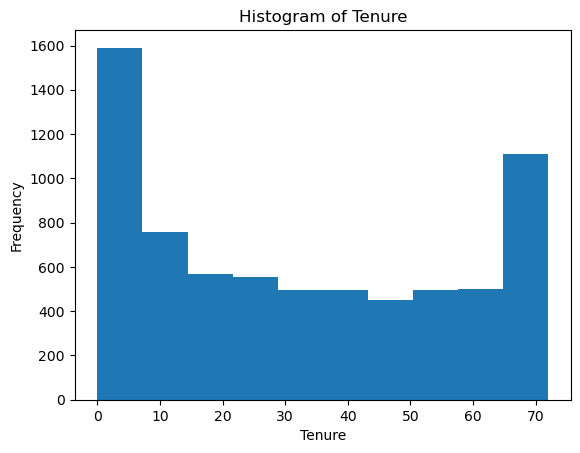

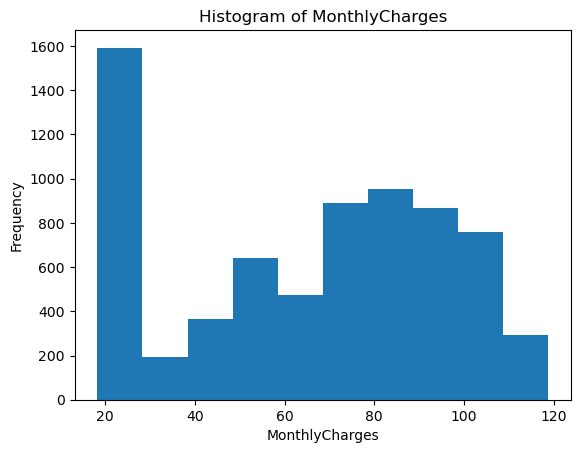

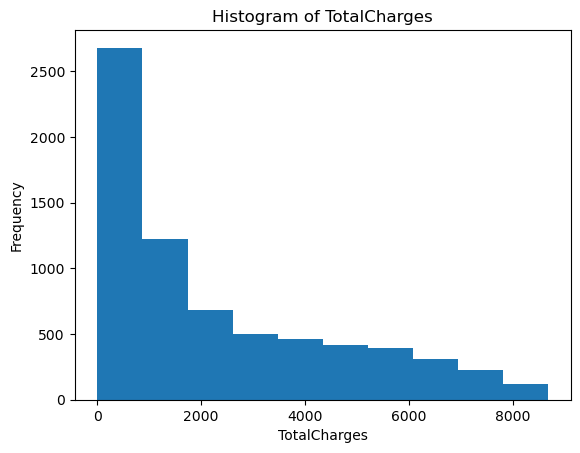

In [164]:
for col in num_cols:
    
    plt.hist(df[col]) 
    plt.title(f"Histogram of {col}") 
    plt.xlabel(col) 
    plt.ylabel("Frequency") 
    plt.show()

# distribution of the tenure have multiple peaks at different intervels
# distribution of the monthly charges most of the customers having lower to mid range and few customers in the higher range. 
# distribution of totalcharges is right skewed distribution ,many customers have low total charges


## Correlation Between Numerical Values

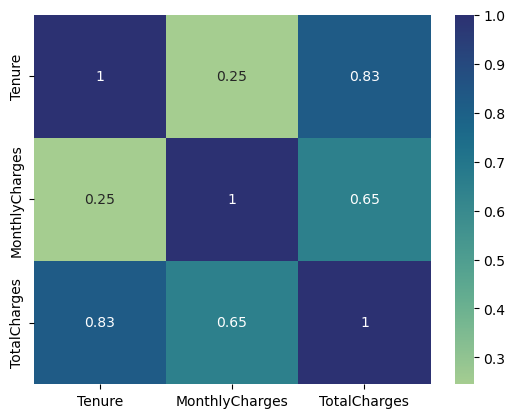

In [165]:
sns.heatmap(df[num_cols].corr(),annot=True,cmap='crest')
plt.show()

### Univariate Analysis of categorical columns 

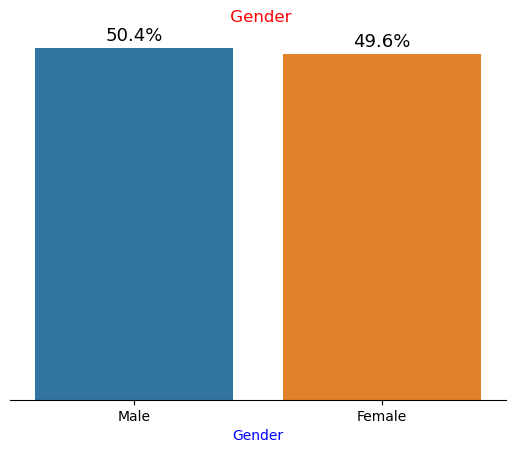

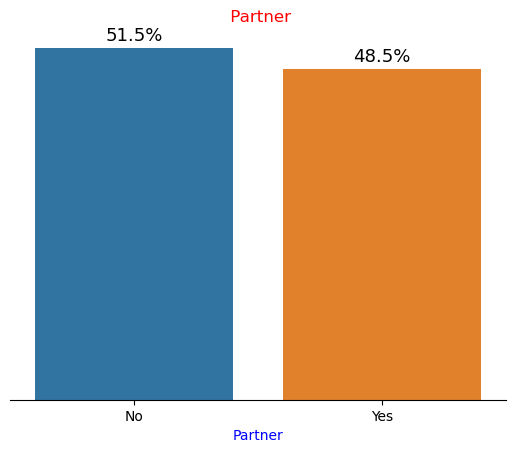

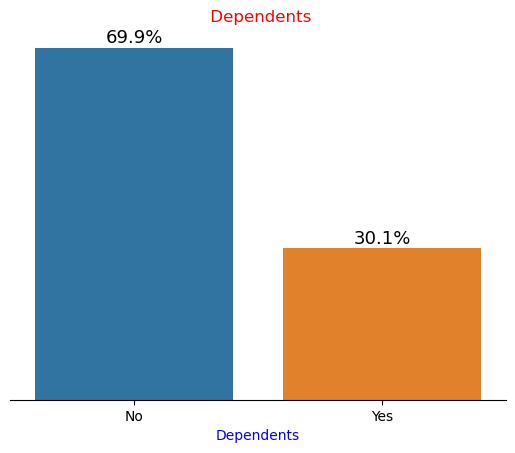

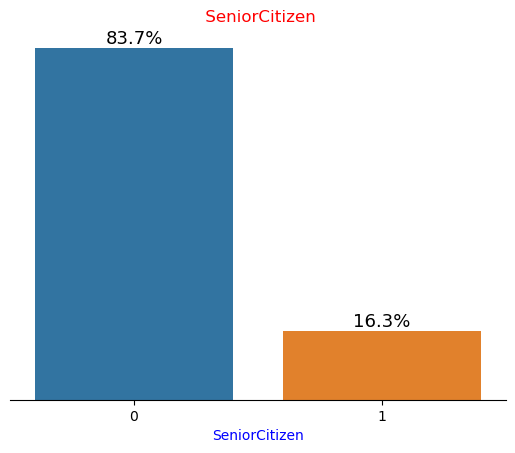

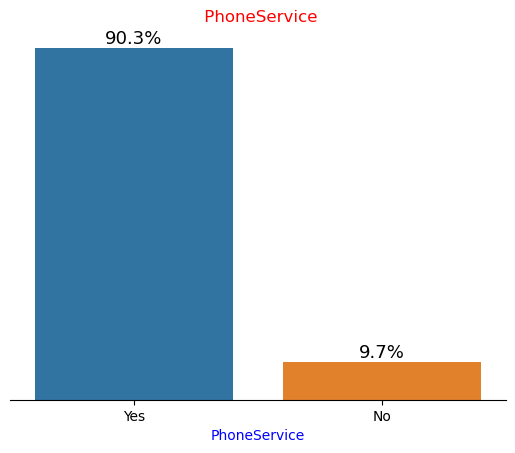

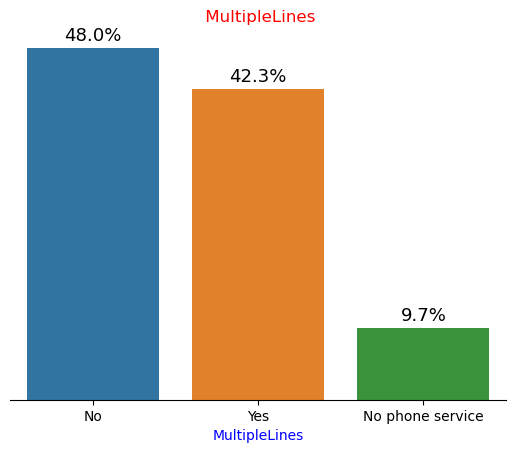

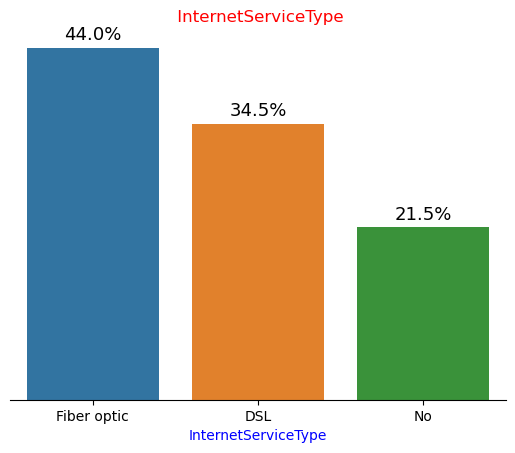

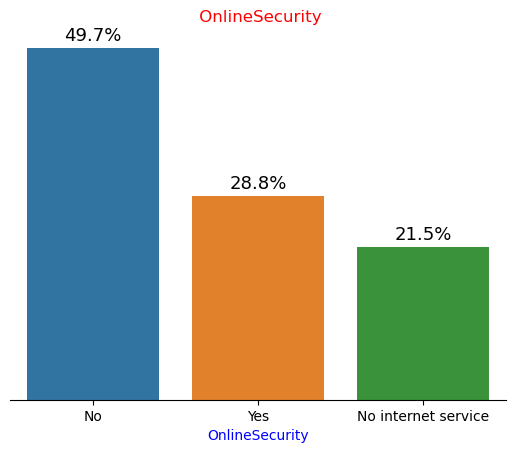

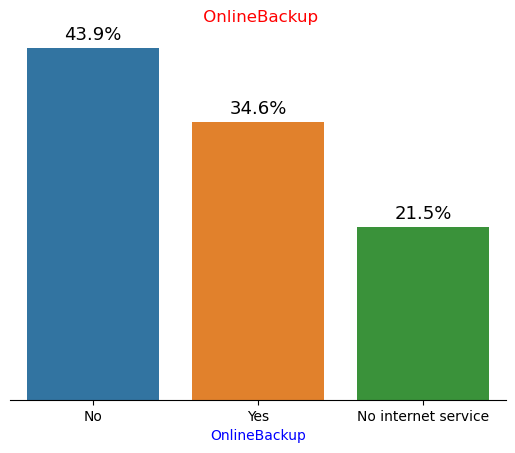

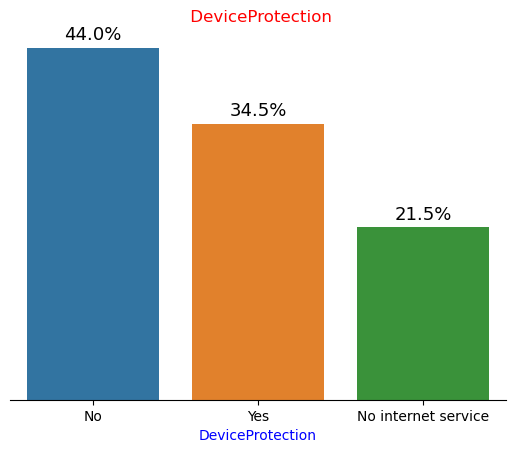

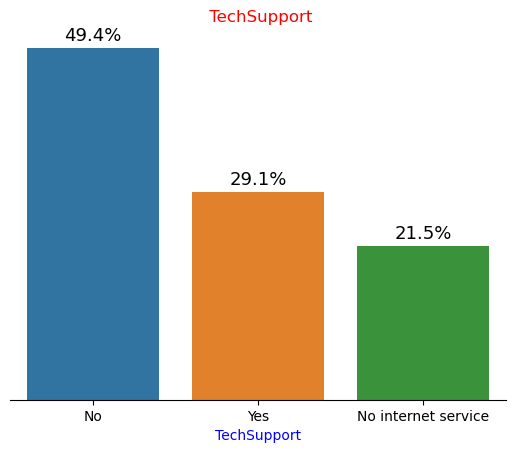

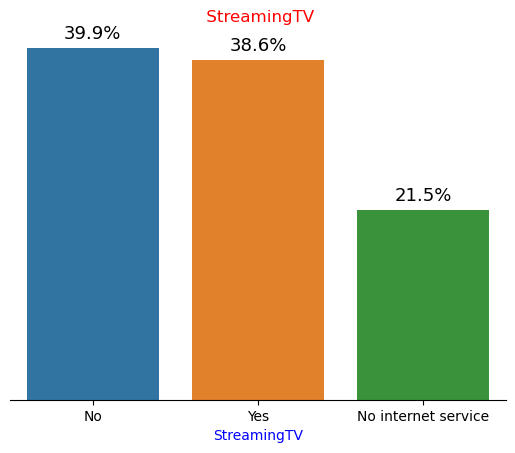

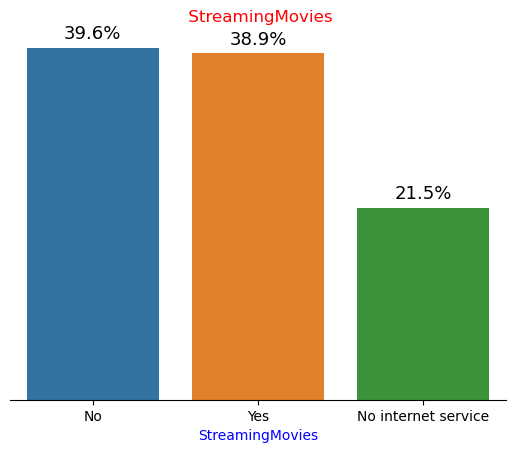

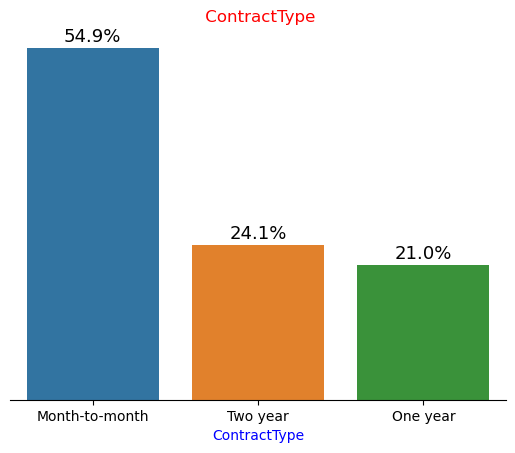

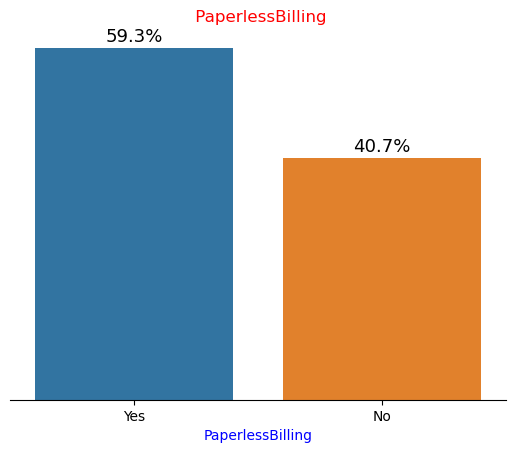

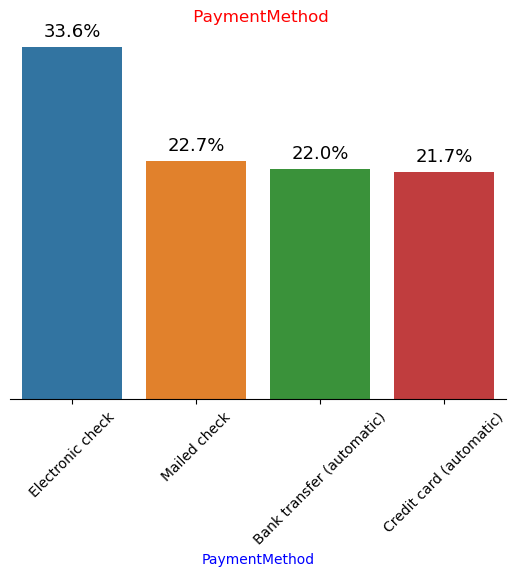

In [166]:
for col in cat_cols:
        rate=df[col].value_counts()/df.shape[0]*100
       # plt.figure(figsize=(8,6))
        sns.barplot(x=rate.index,y=rate.values,hue=rate.index,legend=False) 
        plt.title(f" {col}",color="r") 
        plt.xlabel(col,color="b") 
        plt.xticks(range(0,len(rate.index),1))
        plt.ylabel("Frequency",color="b")
        plt.gca().axes.get_yaxis().set_visible(False)
       
    
        for spine in plt.gca().spines.values():
             spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
        for i,v in (enumerate(rate)):
            plt.text(i
                ,v+1
                ,f"{v:.1f}%"
                ,fontsize=13
                ,ha='center')
        if col=="PaymentMethod":
            plt.xticks(rotation=45)
        plt.show()


### Bivariate analysis (Categorical features vs churn)

In [167]:
churn_summary = df.groupby('Churn')

In [168]:
def data_labels(ax):
    for bar in ax.patches:
        ax.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.01,str(round(bar.get_height()*100,2))+'%',ha='center')

In [169]:
def categorical_vs_churn_dist(feature,filterFea=''):
    color=["blue","green"]
    if filterFea != '':
        feature_summary = df[df[filterFea]==1].groupby('Churn')[feature].value_counts(normalize=True).reset_index(name='Percentage')
        print(feature," summary: \n ", feature_summary)
        plt_cat=sns.catplot(hue=feature,
                    y='Percentage',
                    data = feature_summary,
                    col='Churn',
                    kind='bar',
                    alpha = 0.6)
        plt.xticks(rotation=45)
        plt.ylim(top=1)

    else:
        feature_summary = churn_summary[feature].value_counts(normalize=True).reset_index(name='Percentage')
        print(feature," summary: \n ", feature_summary)
        plt_cat=sns.catplot(x=feature,
                    y='Percentage',
                    data = feature_summary,
                    col='Churn',
                    kind='bar',
                    hue=feature,
                    palette="hls",
                    alpha = 0.5)
        plt.ylim(top=1)
    for i,v in enumerate(feature):
        for ax1,ax2 in plt_cat.axes:
            data_labels(ax1)
            data_labels(ax2)
            
    if feature=="PaymentMethod":
            plt_cat.set_xticklabels(rotation=45)

        
    return plt.show()

Partner  summary: 
    Churn Partner  Percentage
0    No     Yes    0.529241
1    No      No    0.470759
2   Yes      No    0.639742
3   Yes     Yes    0.360258


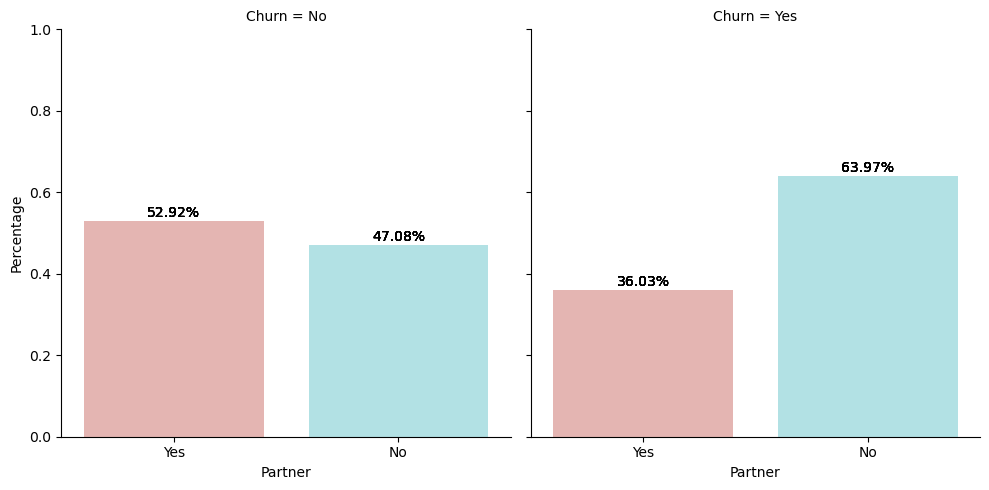

In [170]:
categorical_vs_churn_dist('Partner')

Dependents  summary: 
    Churn Dependents  Percentage
0    No         No    0.654531
1    No        Yes    0.345469
2   Yes         No    0.824448
3   Yes        Yes    0.175552


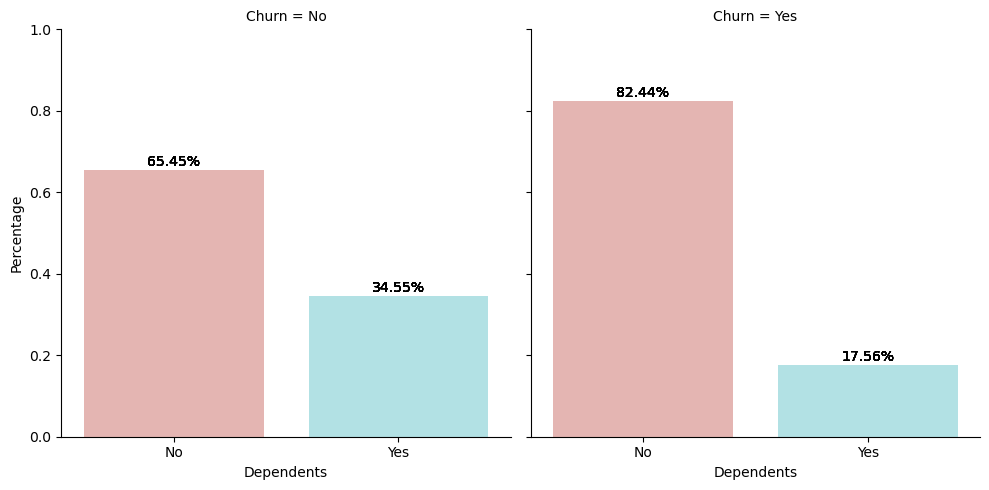

In [171]:
categorical_vs_churn_dist('Dependents')

#### * People who have churned are likely to have no partners or independent

SeniorCitizen  summary: 
    Churn  SeniorCitizen  Percentage
0    No              0    0.871030
1    No              1    0.128970
2   Yes              0    0.744211
3   Yes              1    0.255789


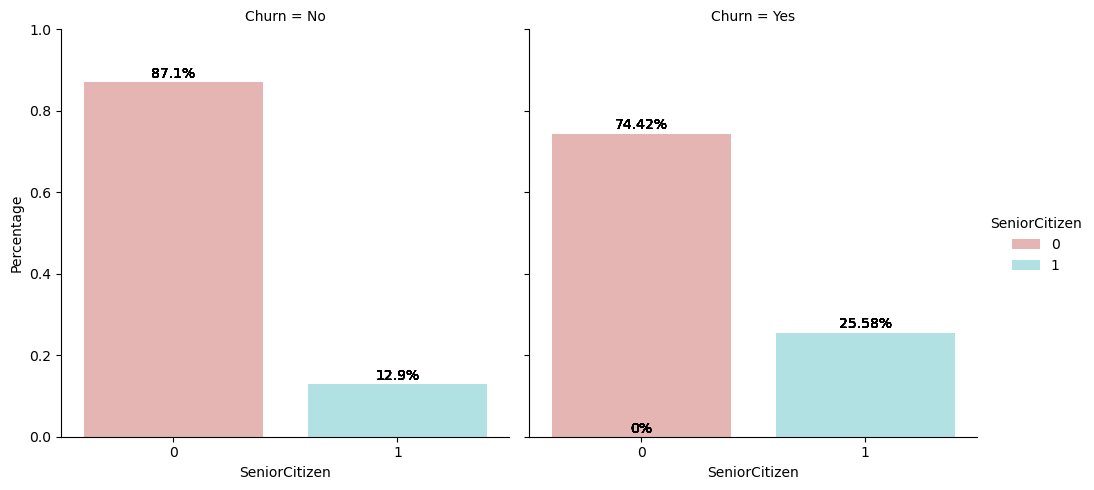

In [172]:
categorical_vs_churn_dist('SeniorCitizen')

#### * Compared to existing Senior citizen customers, the percentage of senior citizens have churned is more.

PhoneService  summary: 
    Churn PhoneService  Percentage
0    No          Yes    0.900852
1    No           No    0.099148
2   Yes          Yes    0.908454
3   Yes           No    0.091546


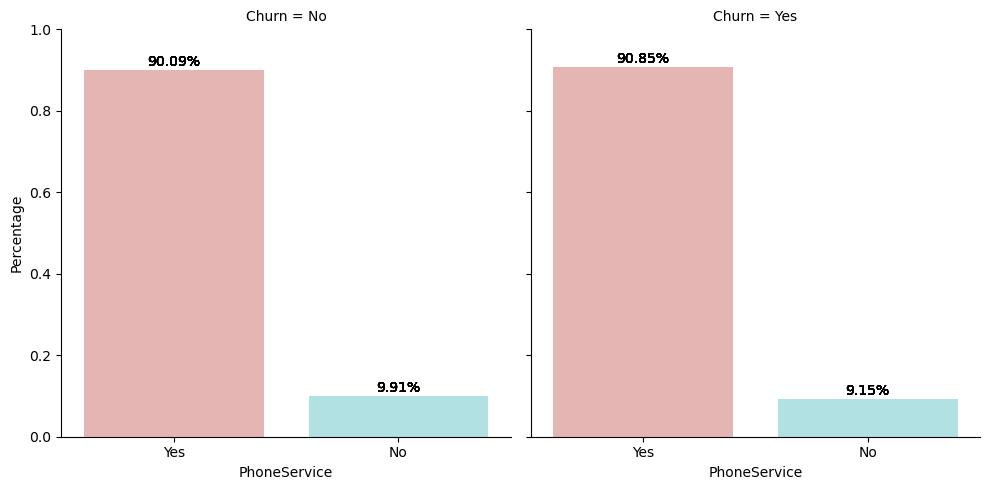

In [173]:
categorical_vs_churn_dist('PhoneService')

#### * 

MultipleLines  summary: 
    Churn     MultipleLines  Percentage
0    No                No    0.490124
1    No               Yes    0.410728
2    No  No phone service    0.099148
3   Yes               Yes    0.457728
4   Yes                No    0.450727
5   Yes  No phone service    0.091546


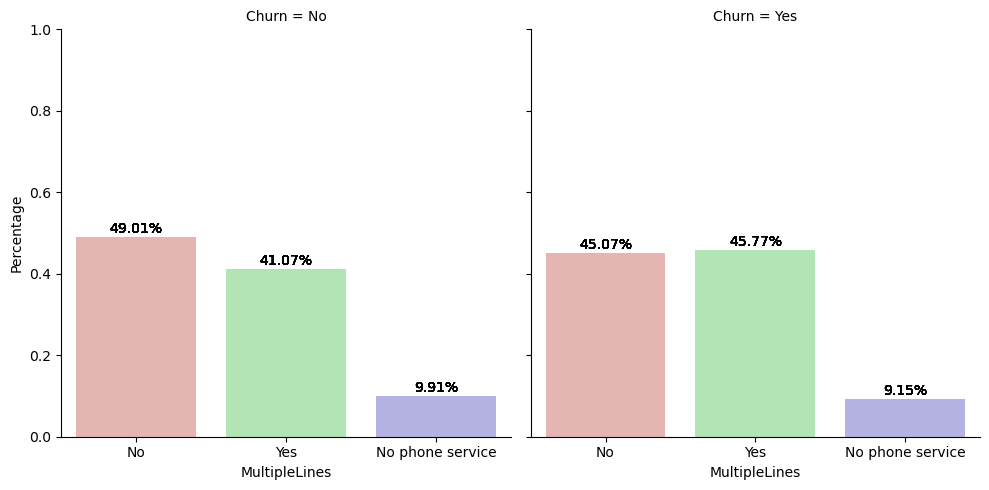

In [174]:
categorical_vs_churn_dist('MultipleLines')

InternetServiceType  summary: 
    Churn InternetServiceType  Percentage
0    No                 DSL    0.379938
1    No         Fiber optic    0.348373
2    No                  No    0.271689
3   Yes         Fiber optic    0.695207
4   Yes                 DSL    0.246096
5   Yes                  No    0.058697


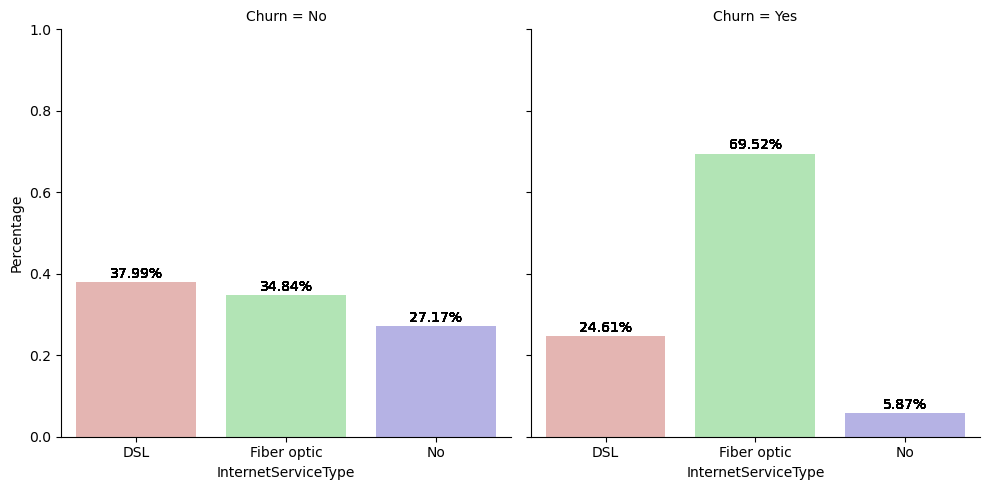

In [175]:
categorical_vs_churn_dist('InternetServiceType')

OnlineSecurity  summary: 
    Churn       OnlineSecurity  Percentage
0    No                   No    0.394462
1    No                  Yes    0.333850
2    No  No internet service    0.271689
3   Yes                   No    0.782445
4   Yes                  Yes    0.158858
5   Yes  No internet service    0.058697


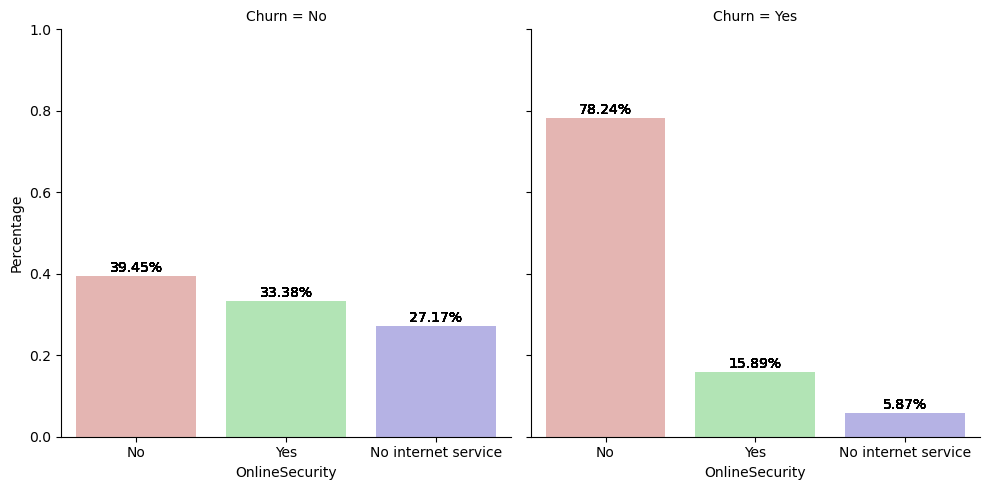

In [176]:
categorical_vs_churn_dist('OnlineSecurity')

OnlineBackup  summary: 
    Churn         OnlineBackup  Percentage
0    No                  Yes    0.369094
1    No                   No    0.359218
2    No  No internet service    0.271689
3   Yes                   No    0.659666
4   Yes                  Yes    0.281637
5   Yes  No internet service    0.058697


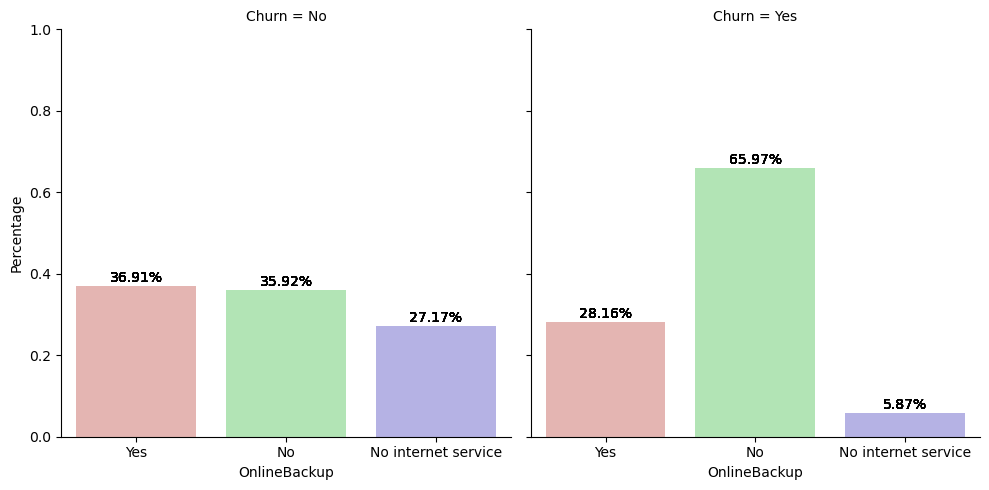

In [177]:
categorical_vs_churn_dist('OnlineBackup')

DeviceProtection  summary: 
    Churn     DeviceProtection  Percentage
0    No                   No    0.364833
1    No                  Yes    0.363478
2    No  No internet service    0.271689
3   Yes                   No    0.647819
4   Yes                  Yes    0.293484
5   Yes  No internet service    0.058697


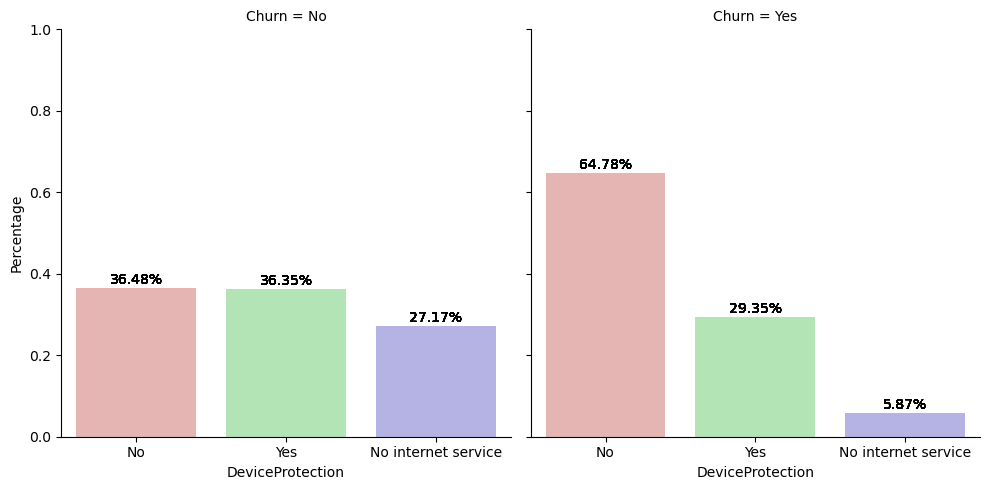

In [178]:
categorical_vs_churn_dist('DeviceProtection')

TechSupport  summary: 
    Churn          TechSupport  Percentage
0    No                   No    0.392525
1    No                  Yes    0.335786
2    No  No internet service    0.271689
3   Yes                   No    0.774367
4   Yes                  Yes    0.166936
5   Yes  No internet service    0.058697


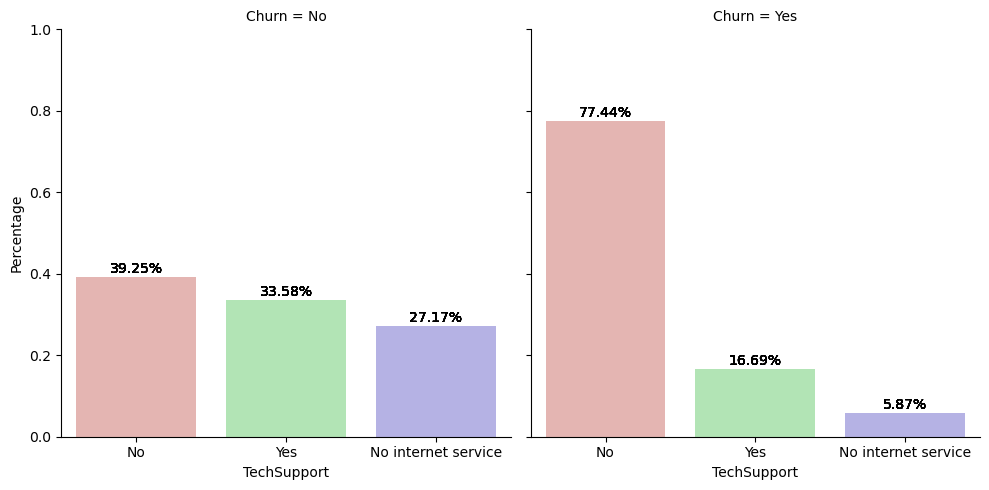

In [179]:
categorical_vs_churn_dist('TechSupport')

StreamingTV  summary: 
    Churn          StreamingTV  Percentage
0    No                  Yes    0.366576
1    No                   No    0.361735
2    No  No internet service    0.271689
3   Yes                   No    0.502962
4   Yes                  Yes    0.438341
5   Yes  No internet service    0.058697


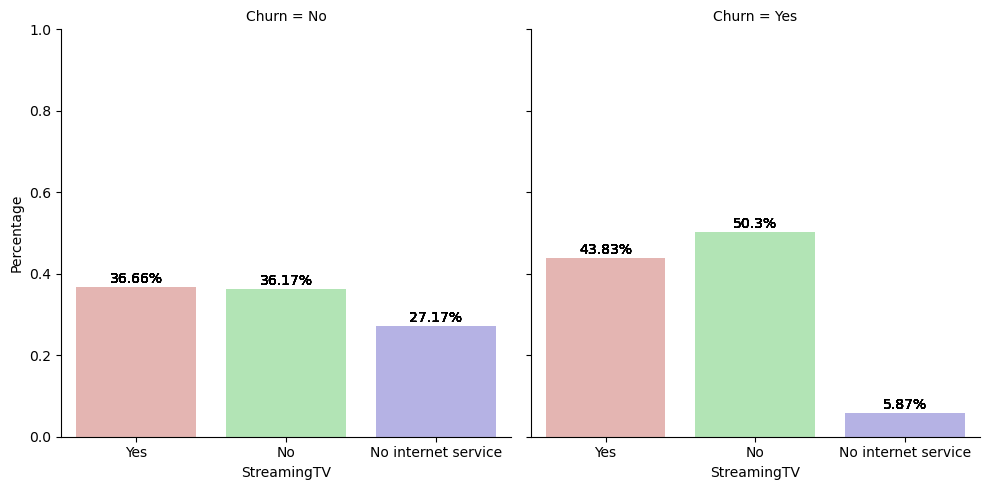

In [180]:
categorical_vs_churn_dist('StreamingTV')

StreamingMovies  summary: 
    Churn      StreamingMovies  Percentage
0    No                  Yes    0.370643
1    No                   No    0.357668
2    No  No internet service    0.271689
3   Yes                   No    0.500808
4   Yes                  Yes    0.440495
5   Yes  No internet service    0.058697


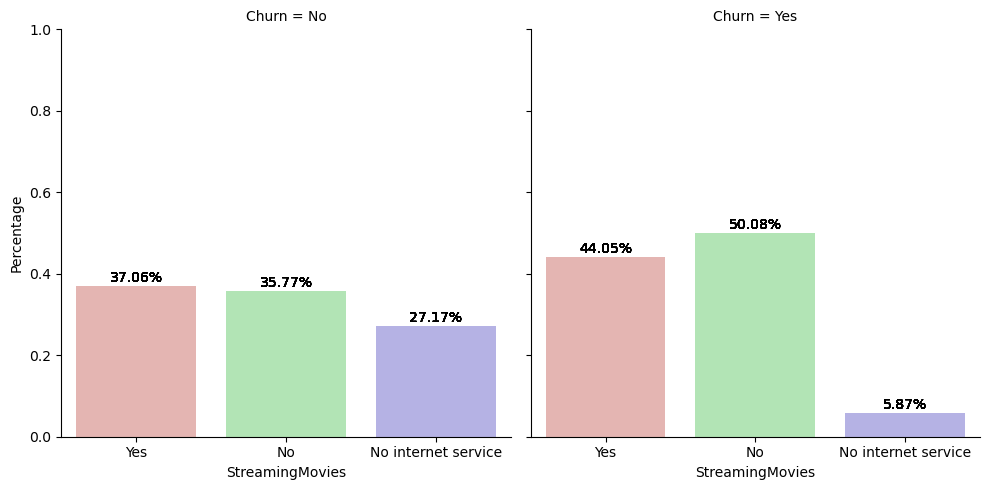

In [181]:
categorical_vs_churn_dist('StreamingMovies')

ContractType  summary: 
    Churn    ContractType  Percentage
0    No  Month-to-month    0.427963
1    No        Two year    0.318939
2    No        One year    0.253098
3   Yes  Month-to-month    0.884760
4   Yes        One year    0.089391
5   Yes        Two year    0.025848


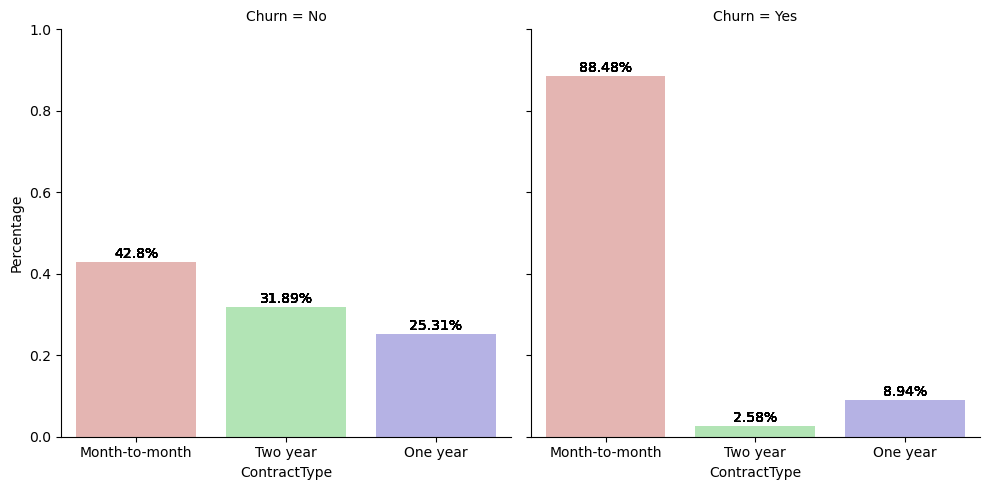

In [182]:
categorical_vs_churn_dist('ContractType')

#### * customers having month to month subscription are more likely to churn because of no contract.

PaperlessBilling  summary: 
    Churn PaperlessBilling  Percentage
0    No              Yes    0.536406
1    No               No    0.463594
2   Yes              Yes    0.749058
3   Yes               No    0.250942


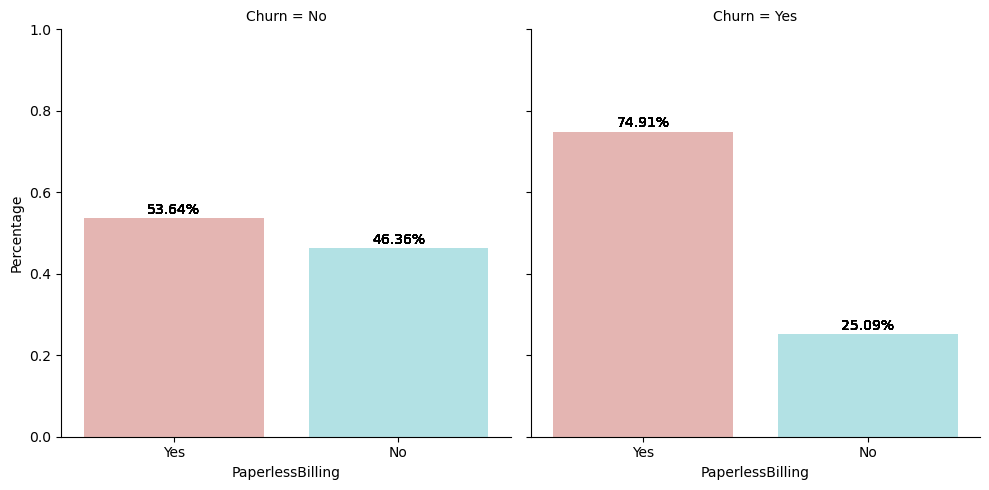

In [183]:
categorical_vs_churn_dist('PaperlessBilling')

PaymentMethod  summary: 
    Churn              PaymentMethod  Percentage
0    No           Electronic check    0.250581
1    No               Mailed check    0.250581
2    No    Credit card (automatic)    0.249806
3    No  Bank transfer (automatic)    0.249032
4   Yes           Electronic check    0.573506
5   Yes               Mailed check    0.162628
6   Yes  Bank transfer (automatic)    0.138934
7   Yes    Credit card (automatic)    0.124933


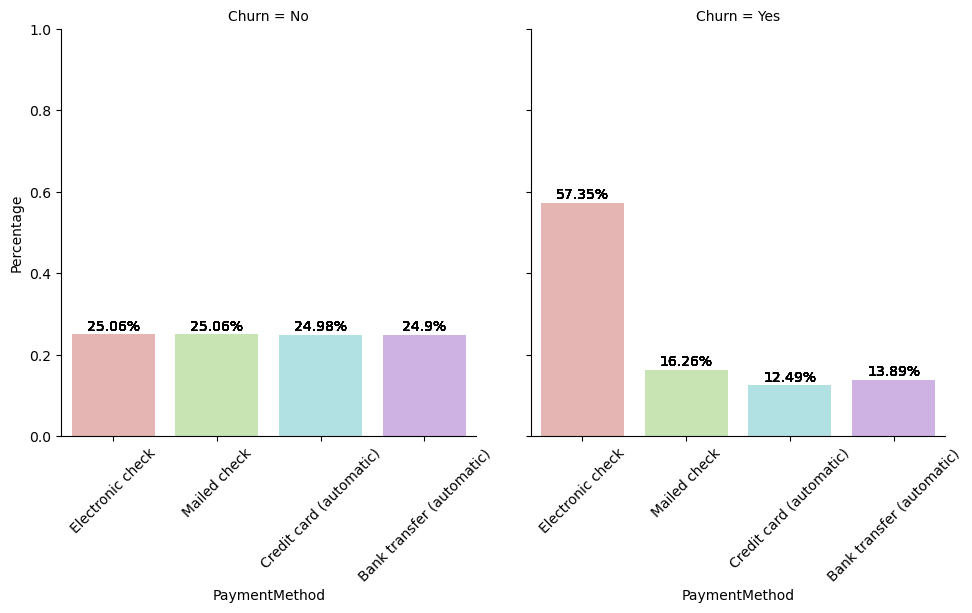

In [184]:
categorical_vs_churn_dist('PaymentMethod')

#### * Customers using electronic check are more likely to churn.

## Numerical Distribution Graph

### Distribution of Tenure with respect to Churn

In [185]:
def numerical_distribution(feature):
    fig=plt.figure(figsize=(15,10))
    plt.subplot(2,1,1)
    ax=sns.kdeplot(df[feature],fill=True,label='Tenure')
    plt.title(feature +" Distribution")

    plt.subplot(2,1,2)
    ax=sns.kdeplot(df.loc[(df["Churn"]=="Yes"),feature],label="Churn",color='g',fill=True)
    ax=sns.kdeplot(df.loc[(df['Churn']=="No") ,feature],label="No Churn",color='b',fill=True,alpha=0.1)  
    plt.title(feature +" Distribution: Churn vs No Churn")
    
    plt.legend()
    plt.show()

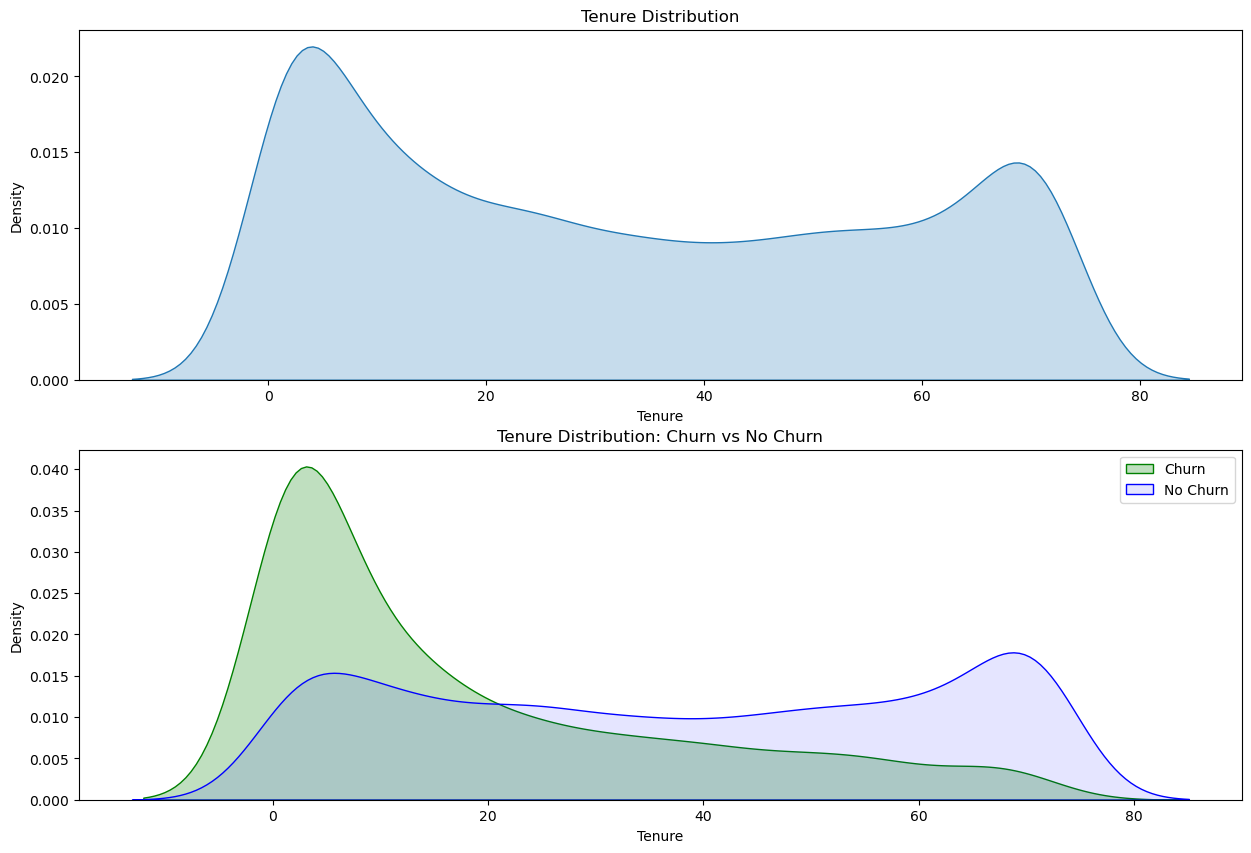

In [186]:
numerical_distribution('Tenure')

#### * Customers who has churned are more likely to have tenure around year.

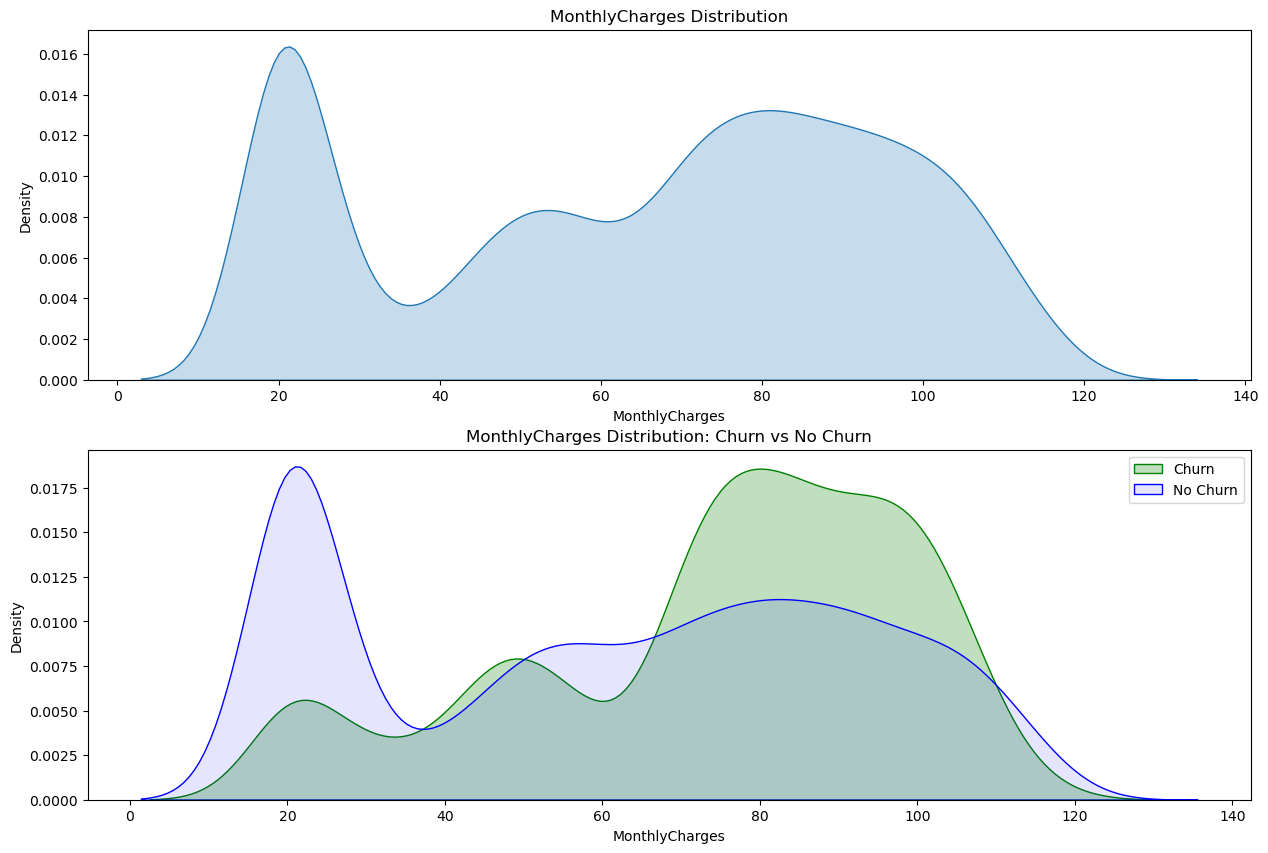

In [187]:
numerical_distribution('MonthlyCharges')

#### * Customers who has churned have monthly charges around 80-100 USD.

## Finding relation between Monthly Charges and Tenure

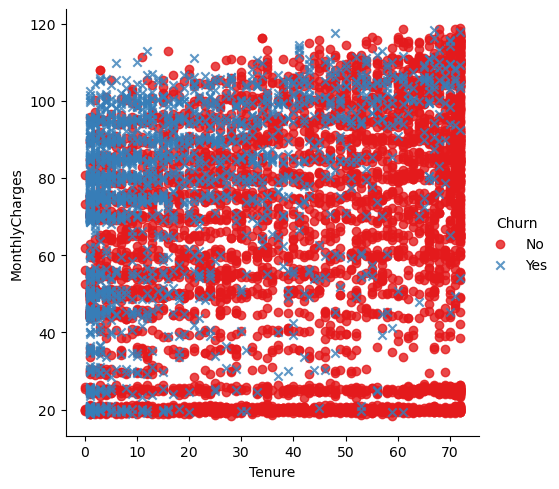

In [188]:
sns.lmplot(x='Tenure',y='MonthlyCharges',data=df
               ,hue='Churn'
               ,fit_reg=False
               ,markers=["o", "x"]
               ,palette="Set1"
          )
plt.show() 

#### * People who tend to have short tenure and high monthly charges are more likely to churn

## Feature Engineering

In [189]:
def InternetService(row):
    if( (row["OnlineSecurity"]=='Yes')| (row['OnlineBackup']=='Yes')|(row['DeviceProtection']=='Yes')|(row ['TechSupport']=='Yes')|(row[ 'StreamingTV']=='Yes')|(row[ 'StreamingMovies']=='Yes')):
        return 1
    else: 
        return 0
df["InternetService"]=df.apply(lambda row: InternetService(row),axis=1)

### Mapping ContractType and InternetServiceType for convinience

In [190]:
def Contract(row):
    if(row["ContractType"]=='Month-to-month'):
       return "No"
    elif ((row["ContractType"]=='One year')|(row["ContractType"]=='Two year')):
        return "Yes"
    
df["ContractType"]=df.apply(lambda row: Contract(row),axis=1)

In [191]:
def IST(row):
    if(row["InternetServiceType"]=='No'):
       return "No"
    elif ((row["InternetServiceType"]=='DSL')|(row["InternetServiceType"]=='Fiber optic')):
        return "Yes"
    
df["InternetServiceType"]=df.apply(lambda row: IST(row),axis=1)

InternetService  summary: 
    Churn  InternetService  Percentage
0    No                1    0.664214
1    No                0    0.335786
2   Yes                1    0.750673
3   Yes                0    0.249327


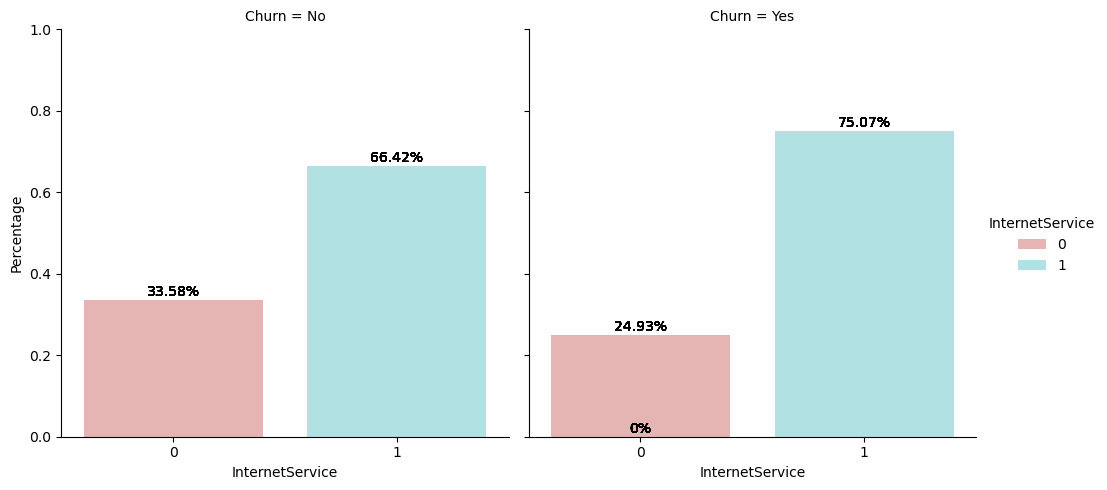

In [192]:
categorical_vs_churn_dist("InternetService")

## Encoding and Scaling

### Encoding

In [193]:
onehotenc=OneHotEncoder(sparse_output=False,drop='first')
encoded=onehotenc.fit_transform(df[cat_cols])
encoded

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [194]:
feature_names=onehotenc.get_feature_names_out(cat_cols)
encoded=pd.DataFrame(encoded,columns=feature_names)
encoded

,Gender_Male,Partner_Yes,Dependents_Yes,SeniorCitizen_1,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetServiceType_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,ContractType_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
7017,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
7018,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7019,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [195]:
label_enc= LabelEncoder()

df["Churn"]=label_enc.fit_transform(df["Churn"])
df[["Churn"]].head(2)

,Churn
0,0
1,0


### Scaling

In [196]:
Scaler=StandardScaler()
for col in num_cols:
    df[col]=Scaler.fit_transform(df[[col]])
df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService
0,Female,0,Yes,No,-1.282728,No,No phone service,Yes,No,Yes,...,No,No,No,No,Yes,Electronic check,-1.164135,-0.995686,0,1
1,Male,0,No,No,0.062387,Yes,No,Yes,Yes,No,...,No,No,No,Yes,No,Mailed check,-0.262811,-0.175262,0,1
2,Male,0,No,No,-1.241967,Yes,No,Yes,Yes,Yes,...,No,No,No,No,Yes,Mailed check,-0.365914,-0.961142,1,1
3,Male,0,No,No,0.510759,No,No phone service,Yes,Yes,No,...,Yes,No,No,Yes,No,Bank transfer (automatic),-0.750058,-0.196769,0,1
4,Female,0,No,No,-1.241967,Yes,No,Yes,No,No,...,No,No,No,No,Yes,Electronic check,0.194503,-0.941951,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,Male,0,Yes,Yes,-0.345224,Yes,Yes,Yes,Yes,No,...,Yes,Yes,Yes,Yes,Yes,Mailed check,0.663458,-0.130704,0,1
7017,Female,0,Yes,Yes,1.611307,Yes,Yes,Yes,No,Yes,...,No,Yes,Yes,Yes,Yes,Credit card (automatic),1.275428,2.239445,0,1
7018,Female,0,Yes,Yes,-0.875118,No,No phone service,Yes,Yes,No,...,No,No,No,No,Yes,Electronic check,-1.172450,-0.856011,0,1
7019,Male,1,Yes,No,-1.160445,Yes,Yes,Yes,No,No,...,No,No,No,No,Yes,Mailed check,0.317562,-0.873592,1,0


In [197]:
df=pd.concat([df,encoded],axis=1)
df.drop(cat_cols,inplace=True,axis=1)

## Model Imbalance

   Churn  Count
0      0   5164
1      1   1857


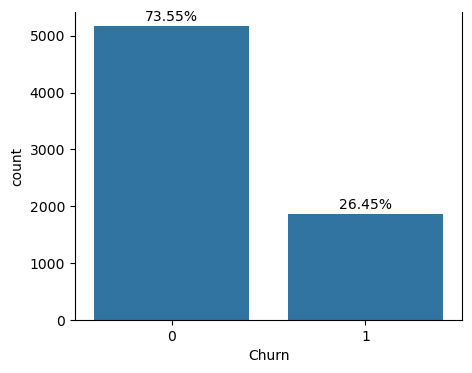

In [198]:
plt.figure(figsize=(5,4))
sns.countplot(x=df["Churn"])
rate=df["Churn"].value_counts()
print(rate.reset_index(name='Count'))

for i,v in enumerate(rate):
    percentage=df["Churn"].value_counts(normalize=True)*100
    plt.text(i,v+100,str(round(percentage.iloc[i],2))+"%",ha="center")

for spine in plt.gca().spines.values():
             spine.set_visible(False) if spine.spine_type == 'top' else spine.set_visible(True)
plt.show()

#### * Here our target value is imbalanced. Hence we have to upsample our data.

In [199]:
X=df.drop("Churn",axis=1)
y=df["Churn"]
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [200]:
#smote
sm=SMOTE(random_state=42,sampling_strategy=1.0)
X_resampled,y_resampled= sm.fit_resample(X,y)
X_train_sm,X_test,y_train_sm,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [201]:
#downsample
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus=rus.fit_resample(X,y)


In [202]:
#upsample
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
X_train_ros,y_train_ros=ros.fit_resample(X,y)

In [203]:
#print("Original Train dataset:", X_train.shape,y_train.shape)
print("Upsampled Train dataset using smote:", X_train_sm.shape,y_train_sm.shape)
print("Upsampled Train dataset RandomOverSampler:", X_train_ros.shape,y_train_ros.shape)
print("Upsampled Train dataset RandomUnderSampler:", X_train_rus.shape,y_train_rus.shape)

Upsampled Train dataset using smote: (8262, 29) (8262,)
Upsampled Train dataset RandomOverSampler: (10328, 29) (10328,)
Upsampled Train dataset RandomUnderSampler: (3714, 29) (3714,)


## Logistic Regression

In [204]:
log_reg = LogisticRegression()
log_reg.fit(X_train_sm,y_train_sm)
y_pred_sm= log_reg.predict(X_test)

In [205]:
#down and up
log_reg.fit(X_train_ros,y_train_ros)
y_pred_ros=log_reg.predict(X_test)

log_reg.fit(X_train_rus,y_train_rus)
y_pred_rus=log_reg.predict(X_test)

#original data
# log_reg.fit(X_train,y_train)
# y_pred=log_reg.predict(X_test)


In [206]:
# accuracy = accuracy_score(y_test,y_pred)
# print("The accuracy of the predicted model using original data :",accuracy)
accuracy = accuracy_score(y_test,y_pred_sm)
print("The accuracy of the predicted model using smote :",accuracy)
accuracy_ros = accuracy_score(y_test,y_pred_ros)
print("The accuracy of the predicted model using over:",accuracy_ros)
accuracy_rus= accuracy_score(y_test,y_pred_rus)
print("The accuracy of the predicted model using under:",accuracy_rus)

The accuracy of the predicted model using smote : 0.7647628267182962
The accuracy of the predicted model using over: 0.7613746369796709
The accuracy of the predicted model using under: 0.7599225556631172


#### * Since the accuracy score after sampling is high for smote, we are proceeding with it.

In [207]:
accuracy = accuracy_score(y_test,y_pred_sm)
print("The accuracy of the predicted model is :",accuracy)

The accuracy of the predicted model is : 0.7647628267182962


In [208]:
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1034
           1       0.75      0.80      0.77      1032

    accuracy                           0.76      2066
   macro avg       0.77      0.76      0.76      2066
weighted avg       0.77      0.76      0.76      2066



## Decision Tree

In [209]:
dtf=DecisionTreeClassifier(random_state=42)
dtf.fit(X_train_sm,y_train_sm)
y_pred_dtf=dtf.predict(X_test)
accuracy_dtf = accuracy_score(y_pred_dtf,y_test)

print("The accuracy score for Decision Tree using smote :",accuracy_dtf)

The accuracy score for Decision Tree using smote : 0.7986447241045499


In [210]:
print(classification_report(y_pred_dtf,y_test))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       998
           1       0.82      0.79      0.80      1068

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



## Random Forest

In [211]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train_sm,y_train_sm)
y_pred_rf=rf.predict(X_test)

print("The accuracy score using random forest for the smote model is:",accuracy_score(y_pred_rf,y_test))

The accuracy score using random forest for the smote model is: 0.8489835430784124


In [212]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1010
           1       0.86      0.84      0.85      1056

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



* The accuracy increased with Random Forest.

### KNN

In [213]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sm,y_train_sm)
y_pred_knn=knn.predict(X_test)

print("The accuracy for KNN using smote is:",accuracy_score(y_pred_knn,y_test))

The accuracy for KNN using smote is: 0.7860600193610843


In [214]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_sm,y_train_sm)
y_pred_knn=knn.predict(X_test)

print("The accuracy for KNN using smote is:",accuracy_score(y_pred_knn,y_test))

The accuracy for KNN using smote is: 0.808809293320426


In [215]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_sm,y_train_sm)
y_pred_knn=knn.predict(X_test)

print("The accuracy for KNN using smote is:",accuracy_score(y_pred_knn,y_test))

The accuracy for KNN using smote is: 0.8068731848983544


In [216]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_sm,y_train_sm)
y_pred_knn=knn.predict(X_test)

print("The accuracy for KNN using smote is:",accuracy_score(y_pred_knn,y_test))

The accuracy for KNN using smote is: 0.8097773475314618


In [217]:
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1081
           1       0.79      0.82      0.81       985

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



### Advanced models

#### Support Vector Machines (SVM)

In [218]:
svm=SVC(random_state=42)
svm.fit(X_train_sm,y_train_sm)
y_pred_svm=svm.predict(X_test)

print("The accuracy for SVM using smote is:",accuracy_score(y_pred_svm,y_test))

The accuracy for SVM using smote is: 0.7802516940948693


In [219]:
print(classification_report(y_pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       992
           1       0.80      0.77      0.78      1074

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



### XGBoost

In [220]:
pip install xgboost

^C
Note: you may need to restart the kernel to use updated packages.


In [221]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
model = XGBClassifier(
    n_estimators=100,       # Number of trees
    max_depth=4,            # Maximum depth of trees
    learning_rate=0.1,      # Step size shrinkage
    objective='binary:logistic', # Binary classification
    eval_metric='logloss' )       # Evaluation metric


# Train the model
model.fit(X_train_sm, y_train_sm)
y_pred_xgb = model.predict(X_test)
print("The accuracy for SVM using smote is:",accuracy_score(y_pred_xgb,y_test))

ModuleNotFoundError: No module named 'xgboost'

In [82]:
print(classification_report(y_pred_xgb,y_test))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       969
           1       0.87      0.82      0.84      1097

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



## Cross validation

In [222]:
cv_scores_rf=cross_val_score(rf,X_train_sm,y_train_sm,cv=5,scoring="accuracy")
print("cross validation score: ",cv_scores_rf)
print("mean accuracy: ",cv_scores_rf.mean())

cross validation score:  [0.8384755  0.84513007 0.85835351 0.85714286 0.83656174]
mean accuracy:  0.8471327354036757


## Hyper parameter tunning
### For Randomforest classifier

#### using GridsearchCV

In [223]:
param_grid_rf ={'n_estimators':[100, 200, 300],
                'max_depth': [5, 9, 15],
                'min_samples_leaf': [1, 4, 6]}
grid_rf=GridSearchCV(RandomForestClassifier(),param_grid=param_grid_rf)
grid_rf.fit(X_train_sm, y_train_sm)

print("Best parameters for RandomForestClassifier:", grid_rf.best_params_)

best_rf_model = grid_rf.best_estimator_

KeyboardInterrupt: 

In [ ]:
grid_rf=RandomForestClassifier(n_estimators=100,
                               max_depth=15,
                               min_samples_leaf=1)
grid_rf.fit(X_train_sm,y_train_sm)
y_pred_grid = grid_rf.predict(X_test) 
print(classification_report(y_pred_grid, y_test))

In [224]:
import pickle
with open("rf_model.pkl", "wb") as file:
    pickle.dump(rf, file)

print("Model saved as rf_model.pkl")


Model saved as rf_model.pkl


In [225]:
with open("encoded_model.pkl", "wb") as file:
    pickle.dump(onehotenc, file)

print("Model saved as encoded_model.pkl")

with open("scaled_model.pkl", "wb") as file:
    pickle.dump(Scaler, file)

print("Model saved as scaled_model.pkl")

Model saved as encoded_model.pkl
Model saved as scaled_model.pkl
